In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

import numpy as np
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

from sklearn.cluster import DBSCAN
from sklearn import metrics

from matplotlib.pyplot import figure

In [3]:
#import dataset
dataset_raw = pd.read_csv("./divar_dataset/divar_posts_dataset.csv")
dataset_raw.head()

%store dataset_raw

Stored 'dataset_raw' (DataFrame)


In [20]:
dataset = dataset_raw[["cat1","cat2","cat3","price"]]
dataset = dataset.dropna()
dataset["product"] = dataset['cat2'] + "__" + dataset['cat3']
dataset = dataset[["product","price"]]
dataset

,product,price
0,furniture-and-home-decore__sofa-armchair,3850000
1,furniture-and-home-decore__antiques-and-art,30000
2,cars__heavy,-1
3,furniture-and-home-decore__sofa-armchair,600000
4,baby-and-toys__personal-toys,450000
...,...,...
947630,building-and-garden__stove-and-heating,180000
947631,audio-video__camera-camcoders,350000
947632,cars__light,17400000
947633,mobile-tablet__mobile-tablet-accessories,40000


dataset['price'] = dataset['price'].astype(int).round(-3)
dataset

In [84]:
dataset = dataset[dataset['price'] != -1]
grouped = dataset.groupby("product").mean()
grouped

,price
product,
animals__accessories,133161.949422
animals__birds,107315.624107
animals__cat,358016.949153
animals__farm-animals,79815.121829
animals__fish,58687.960688
...,...
utensils-and-appliances__fridge-and-freezer,737760.670732
utensils-and-appliances__microwave-stove,322252.654644
utensils-and-appliances__washer-dryer,471001.667902


In [40]:

clean_data = grouped

In [41]:
clean_data_numpy = clean_data.fillna(0)

clean_data_numpy

,price
product,
animals__accessories,133161.949422
animals__birds,107315.624107
animals__cat,358016.949153
animals__farm-animals,79815.121829
animals__fish,58687.960688
...,...
utensils-and-appliances__fridge-and-freezer,737760.670732
utensils-and-appliances__microwave-stove,322252.654644
utensils-and-appliances__washer-dryer,471001.667902


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
clean_data_numpy = scaler.fit_transform(clean_data_numpy)
clean_data_numpy

In [129]:
def evaluate_model(model):
    try:
        silhouete = metrics.silhouette_score(clean_data_numpy, model.labels_, metric='euclidean')
        calinski = metrics.calinski_harabasz_score(clean_data_numpy, model.labels_)
        davies_bouldin_score = metrics.davies_bouldin_score(clean_data_numpy, model.labels_)
    except:
        return None
    return {"silhouete":silhouete, "calinski":calinski,"davies_bouldin_score":davies_bouldin_score}

def print_model_evaluations(model):
    evaluations = evaluate_model(model)
    print("\n"+type(model).__name__+":")
    data = [(a,b) for a, b in sorted(zip(clean_data.index, model.labels_), key=lambda x: x[1])]
    dictionary = {}
    for a , b in data:
        if b not in dictionary:
            dictionary[b] = []
        dictionary[b].append(a)
    
    for label in dictionary.keys():
        print(f"{label} : {dictionary[label]}")
        means = clean_data.transpose()[dictionary[label]].mean(1)
        print(f"label mean : {means}\n\n")
        
    if not evaluations:
        print(" Error")
        return
    for name , result in evaluations.items():
        print(f"{name} : {result}")


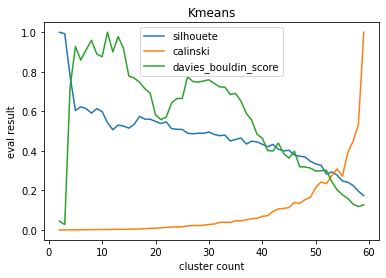

In [115]:
results = [[],[],[]]
cluser_counts = []
for cluster_number in range(2,60):
        
        kmeans = KMeans(n_clusters=cluster_number, random_state=0).fit(clean_data_numpy)
        evaluation = evaluate_model(kmeans)
        if evaluation:
            results[0].append(evaluation["silhouete"])
            results[1].append(evaluation["calinski"])
            results[2].append(evaluation["davies_bouldin_score"])
            cluser_counts.append(cluster_number)
        

results = [l / max(l) for l in results] # normalize result

# plotting the line 1 points 
plt.plot(cluser_counts,results[0], label = "silhouete")

# plotting the line 2 points 
plt.plot(cluser_counts, results[1], label = "calinski")

plt.plot(cluser_counts, results[2], label = "davies_bouldin_score")

plt.xlabel('cluster count')
# Set the y axis label of the current axis.
plt.ylabel('eval result')
# Set a title of the current axes.
plt.title('Kmeans')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

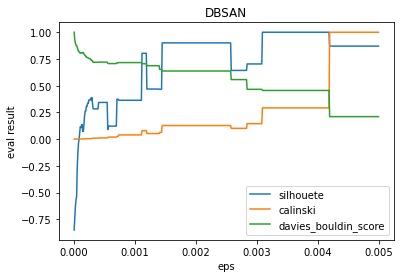

In [133]:
results = [[],[],[]]
eps_values = []
for eps in [x * 0.001 for x in range(1, 500)]:
        
    db = DBSCAN(eps=eps, min_samples=2,metric='euclidean').fit(clean_data_numpy)

    evaluation = evaluate_model(db)
    if evaluation:
        results[0].append(evaluation["silhouete"])
        results[1].append(evaluation["calinski"])
        results[2].append(evaluation["davies_bouldin_score"])
        eps_values.append(eps)
        

results = [l / max(l) for l in results] # normalize result

plt.plot(eps_values,results[0], label = "silhouete")

plt.plot(eps_values, results[1], label = "calinski")

plt.plot(eps_values, results[2], label = "davies_bouldin_score")

plt.xlabel('eps')
# Set the y axis label of the current axis.
plt.ylabel('eval result')
# Set a title of the current axes.
plt.title('DBSAN')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [ ]:
print([(a,b) for a,b in zip(eps_values, results)])

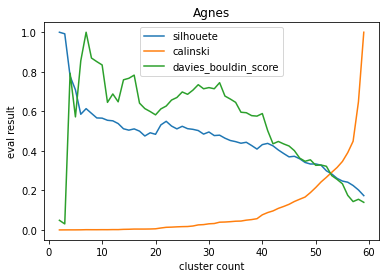

In [46]:
       
results = [[],[],[]]
cluser_counts = []
for cluster_number in range(2,60):
        
    agnes = AgglomerativeClustering(n_clusters=cluster_number,affinity='euclidean',linkage='average').fit(clean_data_numpy)
    evaluation = evaluate_model(agnes)
    if evaluation:
        results[0].append(evaluation["silhouete"])
        results[1].append(evaluation["calinski"])
        results[2].append(evaluation["davies_bouldin_score"])
        cluser_counts.append(cluster_number)
        

results = [l / max(l) for l in results] # normalize result

# plotting the line 1 points 
plt.plot(cluser_counts,results[0], label = "silhouete")

# plotting the line 2 points 
plt.plot(cluser_counts, results[1], label = "calinski")

plt.plot(cluser_counts, results[2], label = "davies_bouldin_score")

plt.xlabel('cluster count')
# Set the y axis label of the current axis.
plt.ylabel('eval result')
# Set a title of the current axes.
plt.title('Agnes')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [135]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(clean_data_numpy)

db = DBSCAN(eps=0.0017, min_samples=2).fit(clean_data_numpy)
agnes = AgglomerativeClustering(n_clusters=10,affinity='euclidean',linkage='average').fit(clean_data_numpy)

In [136]:
models = (agnes, kmeans , db)

for model in models:
    print_model_evaluations(model)


DBSCAN:
-1 : ['cars__heavy', 'cars__light', 'computers__laptops', 'equipments-and-machinery__industrial', 'furniture-and-home-decore__sofa-armchair', 'musical-instruments__piano-keyboard', 'utensils-and-appliances__dishwasher']
label mean : price    1.065597e+07
dtype: float64


0 : ['animals__accessories', 'animals__birds', 'animals__cat', 'animals__farm-animals', 'animals__fish', 'animals__rodents-rabbits', 'audio-video__camera-camcoders', 'audio-video__mp3-player', 'audio-video__stereo-surround', 'audio-video__tv-projector', 'audio-video__video-dvdplayer', 'baby-and-toys__child-car-seat', 'baby-and-toys__childrens-furniture', 'baby-and-toys__personal-toys', 'baby-and-toys__strollers-and-accessories', 'book-student-literature__educational', 'building-and-garden__bathroom-wc-sauna', 'building-and-garden__garden-and-patio', 'building-and-garden__kitchen', 'building-and-garden__stove-and-heating', 'clothing-and-shoes__clothing', 'clothing-and-shoes__shoes-belt-bag', 'computers__desktop